In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../Data/Bank_of_America_data.csv")
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
data.shape

(5960, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


##### Description Data:
- Dans ce jeu de données  on a 5960 clients et 13 variables dont 2 qualitatives (REASON: qui posséde 2 modalités,JOB:qui posséde 6 modalités) et 11 variables quantitatives.
- La cible au niveau de ce jeu de données sera la variables quantitatives "BAD" qui posséde deux valeurs : 0 ou 1

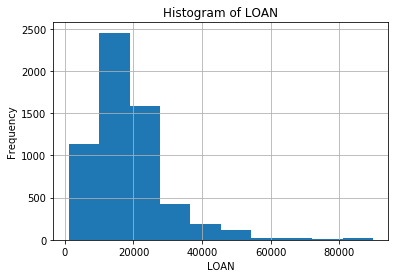

In [9]:
data.LOAN.hist()
plt.title('Histogram of LOAN')
plt.xlabel('LOAN')
plt.ylabel('Frequency')
plt.savefig('hist_LOAN')

- La plupart des clients de cette banque dans ce dataset demande un prêt entre 14000 et 16000

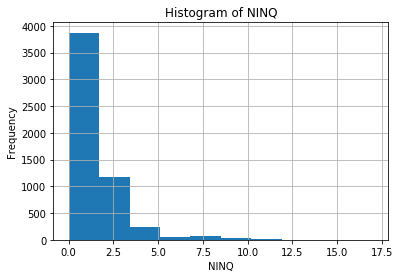

In [10]:
data.NINQ.hist()
plt.title('Histogram of NINQ')
plt.xlabel('NINQ')
plt.ylabel('Frequency')
plt.savefig('hist_NINQ')

- La plupart des clients de cette banque dans ce dataset posséde a peu prés 2 crédits en cours 

In [11]:
data.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

- ce dataset posséde des valeurs manquantes dans presque toutes les variables, on a essayé de supprimer, de remplacer par 
la mediane, la valeur la plus fréquente et la moyenne les valeurs manquantes des variables quanti et on a remarqué que 
le remplacement par la moyenne a donné le meilleur score 

In [12]:
MORTDUE = data['MORTDUE'].mean()
data['MORTDUE'].fillna(MORTDUE, inplace=True)

VALUE = data['VALUE'].mean()
data['VALUE'].fillna(VALUE, inplace=True)

YOJ = data['YOJ'].mean()
data['YOJ'].fillna(YOJ, inplace=True)

DEROG = data['DEROG'].mean()
data['DEROG'].fillna(DEROG, inplace=True)

DELINQ = data['DELINQ'].mean()
data['DELINQ'].fillna(DELINQ, inplace=True)

CLAGE = data['CLAGE'].mean()
data['CLAGE'].fillna(CLAGE, inplace=True)

NINQ = data['NINQ'].mean()
data['NINQ'].fillna(NINQ, inplace=True)

CLNO = data['CLNO'].mean()
data['CLNO'].fillna(CLNO, inplace=True)

DEBTINC = data['DEBTINC'].mean()
data['DEBTINC'].fillna(DEBTINC, inplace=True)

data.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     252
JOB        279
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC      0
dtype: int64

- Maintenant qu'on a remplacé les valeurs manquantes des variables quanti,il nous reste les 2 variables quanli JOB et REASON
- Mais avant on a detecté plusieurs points aberrants qui peuvent biaisés notre jeu de donées on va donc essayer de les réduire

### Analyse des valeurs aberrantes:

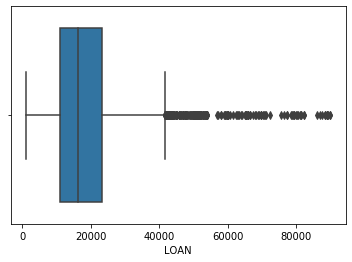

In [13]:
outliers=[]
sns.boxplot(x=data['LOAN']);

In [14]:
dfw = data['LOAN']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [15]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [16]:
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256)]

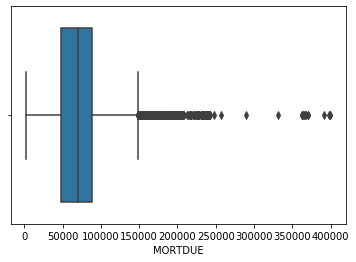

In [17]:
sns.boxplot(x=data['MORTDUE']);

In [18]:
dfw = data['MORTDUE']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [19]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)

In [20]:
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  652,  717,  719,
             ...
             5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929],
            dtype='int64', length=308)]

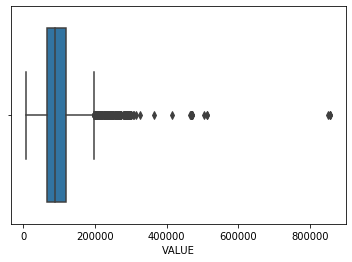

In [21]:
sns.boxplot(x=data['VALUE']);

In [22]:
dfw = data['VALUE']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [23]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  652,  717,  719,
             ...
             5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929],
            dtype='int64', length=308),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  542,  595,  652,
             ...
             5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5933, 5934],
            dtype='int64', length=347)]

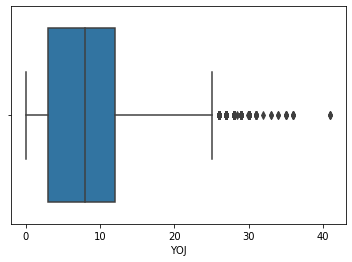

In [24]:
sns.boxplot(x=data['YOJ']);

In [25]:
dfw = data['YOJ']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  652,  717,  719,
             ...
             5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929],
            dtype='int64', length=308),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  542,  595,  652,
             ...
             5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5933, 5934],
            dtype='int64', length=347),
 Int64Index([  31,   53,  263,  308,  407,  408,  411,  412,  416,  593,
             ...
             5935, 5938, 5939, 5940, 5941, 5942, 5943, 5945, 5946, 5947],
            dtype='int64', length=211)]

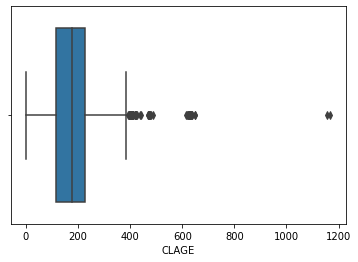

In [26]:
sns.boxplot(x=data['CLAGE']);

In [27]:
dfw = data['CLAGE']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  652,  717,  719,
             ...
             5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929],
            dtype='int64', length=308),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  542,  595,  652,
             ...
             5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5933, 5934],
            dtype='int64', length=347),
 Int64Index([  31,   53,  263,  308,  407,  408,  411,  412,  416,  593,
             ...
             5935, 5938, 5939, 5940, 5941, 5942, 5943, 5945, 5946, 5947],
            dtype='int64', length=211),
 Int64Index([ 202,  379,  411,  423,  469,  540,  712,  786,  880,  909, 1166,
             1173, 1205, 1305, 1431, 1470, 1492, 1532, 1549, 1797, 1839, 1848,
             2010, 2198, 3

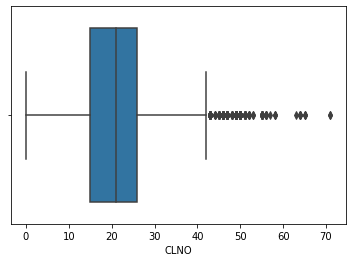

In [28]:
sns.boxplot(x=data['CLNO']);

In [29]:
dfw = data['CLNO']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  652,  717,  719,
             ...
             5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929],
            dtype='int64', length=308),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  542,  595,  652,
             ...
             5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5933, 5934],
            dtype='int64', length=347),
 Int64Index([  31,   53,  263,  308,  407,  408,  411,  412,  416,  593,
             ...
             5935, 5938, 5939, 5940, 5941, 5942, 5943, 5945, 5946, 5947],
            dtype='int64', length=211),
 Int64Index([ 202,  379,  411,  423,  469,  540,  712,  786,  880,  909, 1166,
             1173, 1205, 1305, 1431, 1470, 1492, 1532, 1549, 1797, 1839, 1848,
             2010, 2198, 3

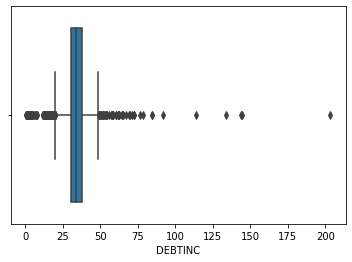

In [30]:
sns.boxplot(x=data['DEBTINC']);

In [31]:
dfw = data['DEBTINC']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers.index
outliers.append(dfw_outliers.index)
outliers

[Int64Index([5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713,
             ...
             5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959],
            dtype='int64', length=256),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  652,  717,  719,
             ...
             5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929],
            dtype='int64', length=308),
 Int64Index([ 140,  194,  291,  326,  345,  414,  451,  542,  595,  652,
             ...
             5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5933, 5934],
            dtype='int64', length=347),
 Int64Index([  31,   53,  263,  308,  407,  408,  411,  412,  416,  593,
             ...
             5935, 5938, 5939, 5940, 5941, 5942, 5943, 5945, 5946, 5947],
            dtype='int64', length=211),
 Int64Index([ 202,  379,  411,  423,  469,  540,  712,  786,  880,  909, 1166,
             1173, 1205, 1305, 1431, 1470, 1492, 1532, 1549, 1797, 1839, 1848,
             2010, 2198, 3

In [32]:
for i in range(0,7):
    data=data.drop(outliers[i], errors='ignore')

- En supprimant les valeurs aberrantes le nombre des clients a diminué de 5960 à 4762

In [33]:
data.shape

(4762, 13)

- Maitenant on va remplacer les valeurs manquantes des variables qualitatives : REASON,JOB par null pour pouvoir appliquer KMEANS et KNN

In [34]:
data["REASON"].fillna("null", inplace = True)
data["JOB"].fillna("null", inplace = True)

In [35]:
data.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [36]:
data.reset_index(drop=True,inplace=True)
data.shape

(4762, 13)

In [37]:
dataReasonNull=data[data.REASON=='null']
dataReasonNonNull=data[data.REASON!="null"]

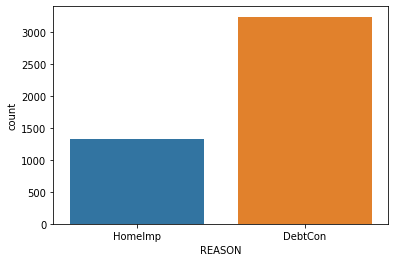

In [38]:
import seaborn as sns
sns.countplot(dataReasonNonNull['REASON'],label="Count")
plt.show()

- En affichant le barplot de la variable quali reason on a remarque que les modalités sont déséquilibrés 

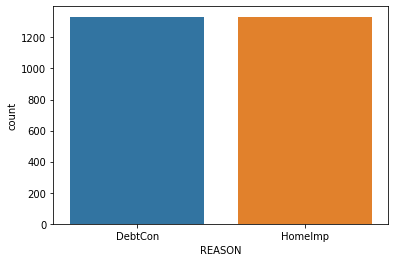

In [39]:
# Données déséquilibrées : faire un sous echantillonnage des DebtCon pour avoir autant de DebtCon que de HomeImp
def downsample(df, label_col_name):
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes 
            .reset_index(drop=True)
            )
df=downsample(dataReasonNonNull,"REASON")
sns.countplot(df["REASON"],label="Count")
plt.show()

In [40]:
df.shape

(2666, 13)

In [41]:
dataReasonNonNull.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


#####  Appliquer la methode KNN avec une cible "REASON"

In [42]:
X = pd.concat([dataReasonNonNull.iloc[:,1:4],dataReasonNonNull.iloc[:,6:]],axis=1)
Y = dataReasonNonNull.iloc[:,4]

In [43]:
# On a diviser les données en données d'entraînement et des données de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, random_state = 0)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [45]:
# Choisir le meilleur k
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, Y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Erreur')

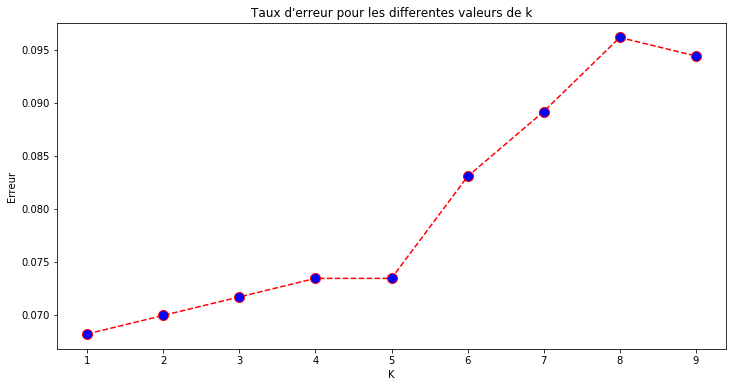

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

- le taux d'erreur est minimal lorsque k=1

In [47]:
model_median = KNeighborsClassifier(n_neighbors=1)
model_median.fit(X_train, Y_train)
acc_median = model_median.score(X_test, Y_test)
print(acc_median)

0.9318181818181818


In [48]:
dataReasonNull.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1,1500,73760.8172,101776.048741,null,null,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
10,1,2000,22608.0000,101776.048741,null,null,18.000000,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
13,0,2000,64536.0000,87400.000000,null,Mgr,2.500000,0.00000,0.000000,147.133333,0.000000,24.000000,33.779915
48,0,3100,73760.8172,70400.000000,null,null,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
68,0,3800,73760.8172,73189.000000,null,null,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,22.253949


In [49]:
DATA_REASON_XTEST = pd.concat([dataReasonNull.iloc[:,1:4],dataReasonNull.iloc[:,6:]],axis=1)
DATA_REASON_XTEST.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3,1500,73760.8172,101776.048741,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
10,2000,22608.0000,101776.048741,18.000000,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
13,2000,64536.0000,87400.000000,2.500000,0.00000,0.000000,147.133333,0.000000,24.000000,33.779915
48,3100,73760.8172,70400.000000,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915
68,3800,73760.8172,73189.000000,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,22.253949


In [50]:
DATA_REASON_XTEST.shape

(187, 10)

In [51]:
DATA_REASON_XTEST = scaler.fit_transform(DATA_REASON_XTEST)

In [52]:
predicted = knn_model.predict(DATA_REASON_XTEST)
len(predicted)

187

In [53]:
DATA_TEST=dataReasonNull.drop(columns=["REASON"])
DATA_TEST.reset_index(drop=True,inplace=True)

In [54]:
DATA_TEST["REASON"] = pd.DataFrame(predicted)
DATA_TEST.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON
0,1,1500,73760.8172,101776.048741,null,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,HomeImp
1,1,2000,22608.0000,101776.048741,null,18.000000,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,HomeImp
2,0,2000,64536.0000,87400.000000,Mgr,2.500000,0.00000,0.000000,147.133333,0.000000,24.000000,33.779915,DebtCon
3,0,3100,73760.8172,70400.000000,null,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,33.779915,HomeImp
4,0,3800,73760.8172,73189.000000,null,8.922268,0.25457,0.449442,179.766275,1.186055,21.296096,22.253949,DebtCon


In [55]:
DATA_TEST.shape

(187, 13)

In [56]:
ReasonNonNull=dataReasonNonNull["REASON"]
DATA_BRUT=dataReasonNonNull.drop(columns=["REASON"])
DATA_BRUT["REASON"]=pd.DataFrame(ReasonNonNull)
DATA_BRUT.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,HomeImp
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,HomeImp
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,HomeImp
4,0,1700,97800.0,112000.0,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,HomeImp
5,1,1700,30548.0,40320.0,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,HomeImp


In [57]:
DataFinal = pd.concat([DATA_BRUT, DATA_TEST])
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,HomeImp
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,HomeImp
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,HomeImp
4,0,1700,97800.0,112000.0,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,HomeImp
5,1,1700,30548.0,40320.0,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,HomeImp


- On a maintenant remplacé les valeurs "null" par les valeurs prédites de la méthode KNN

#### Encodage de la variable REASON en utilisant LabelEncoder:

In [58]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
REASON=LE.fit_transform(DataFinal["REASON"].values)

In [59]:
DataFinal.drop(columns=["REASON"],inplace=True)

In [60]:
DataFinal.reset_index(drop=True,inplace=True)

In [61]:
DataFinal["REASON"]=pd.DataFrame(REASON)

In [62]:
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1
3,0,1700,97800.0,112000.0,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1
4,1,1700,30548.0,40320.0,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1


In [63]:
DataFinal.shape

(4762, 13)

#### Variable JOB: 
- On a essayé de remplacer les valeurs "null" en utilisant KNN sauf qu'on a obtenu un score faible donc on va appliquer KMEANS

In [64]:
DataFinal["JOB"].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'null', 'Self'],
      dtype=object)

In [65]:
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1
3,0,1700,97800.0,112000.0,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1
4,1,1700,30548.0,40320.0,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1


In [66]:
DataJob=pd.concat([DataFinal.iloc[:,1:4],DataFinal.iloc[:,5:-1]],axis=1)
DataJob.shape

(4762, 10)

In [67]:
from sklearn import cluster 
from sklearn.cluster import KMeans
kmeansJob = KMeans(n_clusters=5)
kmeansJob.fit(DataJob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
pd.crosstab(DataFinal.iloc[:,4],kmeansJob.labels_)

col_0,0,1,2,3,4
JOB,,,,,
Mgr,152,78,127,145,172
Office,144,109,45,208,259
Other,228,430,83,686,563
ProfExe,259,103,118,139,339
Sales,14,10,10,20,26
Self,38,25,5,5,8
null,48,16,0,92,58


- En affichant le tableau croisé on a remarqué que "null" dépend de "Other": A chaque fois que "Other" est elevée dans un cluster,  "null" l'est aussi et inversement on va donc regrouper "null" et "other" dans une seule modalité "Other"

In [69]:
JOB=DataFinal["JOB"].replace({"null":"Other"})
JOB.head()
JOB.reset_index(drop=True,inplace=True)

In [70]:
DataFinal.drop(columns=["JOB"],inplace=True)
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1
3,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1
4,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1


In [71]:
DataFinal["JOB"]=JOB

In [72]:
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1,Other
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1,Other
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1,Other
3,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1,Office
4,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,Other


In [73]:
DataFinal["JOB"].unique()

array(['Other', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'], dtype=object)

## Encodage JOB:

In [74]:
from sklearn.preprocessing import OneHotEncoder
OE = OneHotEncoder()

In [75]:
matrice = OE.fit_transform(DataFinal["JOB"].values.reshape(-1,1)).toarray()
# 2:Other 1:Office  0:Mgr 3: ProfExe 4:Sales 5:Self

In [76]:
Job=pd.DataFrame(matrice,columns=["Mgr","Office","Other","ProfExe","Sales","Self"])
Job.drop(columns=["Self"],inplace=True)

In [77]:
DataFinal=pd.concat([DataFinal.iloc[:,0:-1],Job],axis=1)

In [78]:
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Mgr,Office,Other,ProfExe,Sales
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
3,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1,0.0,1.0,0.0,0.0,0.0
4,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0.0,0.0,1.0,0.0,0.0


## StandardScaler:

- On va apliquer StandardScaler que sur les variables quanti

In [79]:
DataFinalCR=DataFinal.iloc[:,1:11]
DataFinalCR.shape

(4762, 10)

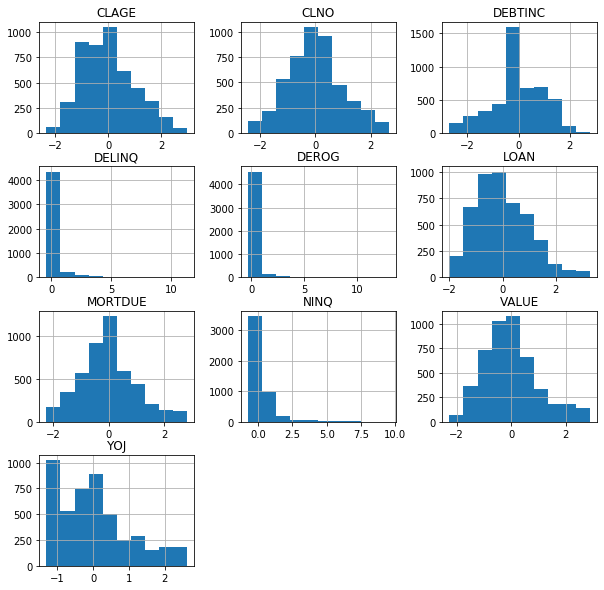

In [80]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
DataFinalACP=pd.DataFrame(StandardScaler.fit_transform(DataFinalCR.values),columns=DataFinalCR.columns)
DataFinalACP.hist(figsize=(10,10));

In [81]:
DataFinalACP.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-2.004461,-1.419196,-1.421019,0.347230,-0.326025,-0.428657,-1.038659,-0.124083,-1.344045,-0.051515
1,-1.978245,0.122655,-0.622392,-0.204744,-0.326025,1.537249,-0.660263,-0.726637,-0.737949,-0.051515
2,-1.952028,-1.850424,-2.027975,-0.677864,-0.326025,-0.428657,-0.279572,-0.124083,-1.222825,-0.051515
3,-1.925812,1.090722,0.562974,-0.835570,-0.326025,-0.428657,-1.052894,-0.726637,-0.737949,-0.051515
4,-1.925812,-1.255636,-1.385812,0.110670,-0.326025,-0.428657,-0.940854,-0.124083,-1.465264,0.592379


## ACP:

In [82]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = decomposition.PCA()
Data_Pca = pca.fit_transform(DataFinalACP)
pca.explained_variance_ratio_

array([0.22378255, 0.13304602, 0.11883658, 0.10238544, 0.09667793,
       0.08239024, 0.07973626, 0.07373391, 0.06987392, 0.01953716])

In [83]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [84]:
print(pca.n_components_)

10


In [85]:
var = pca.explained_variance_
var

array([2.23829551, 1.3307396 , 1.18861538, 1.02406945, 0.96698239,
       0.82407541, 0.79753011, 0.73749393, 0.69888595, 0.19541267])

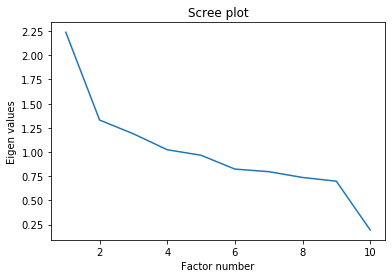

In [86]:
p = DataFinalACP.shape[1]
plt.plot(np.arange(1,p+1),var)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show() 

- il ya une cassure au niveau 2 donc selon le critére de coud on va retenir 2 dimensions

In [87]:
print(pd.DataFrame({'Val.Propre':var}))

   Val.Propre
0    2.238296
1    1.330740
2    1.188615
3    1.024069
4    0.966982
5    0.824075
6    0.797530
7    0.737494
8    0.698886
9    0.195413


- Selon le critére de kaiser on devrait retenir les 4 premieres composantes( valeur propre > 1), pour la suite on va se baser sur le critére de Kaiser

In [85]:
DataFinalACP.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')

In [86]:
from mlxtend.plotting import plot_pca_correlation_graph

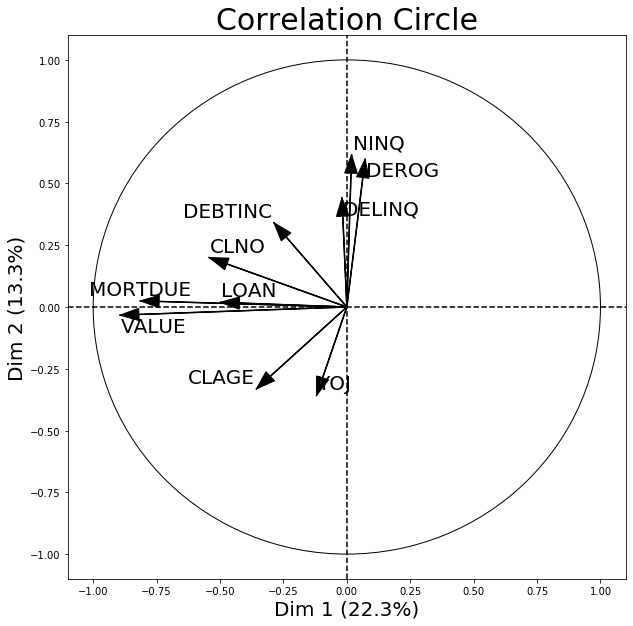

In [87]:
feature_names=['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
figure, correlation_matrix = plot_pca_correlation_graph(DataFinalACP, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

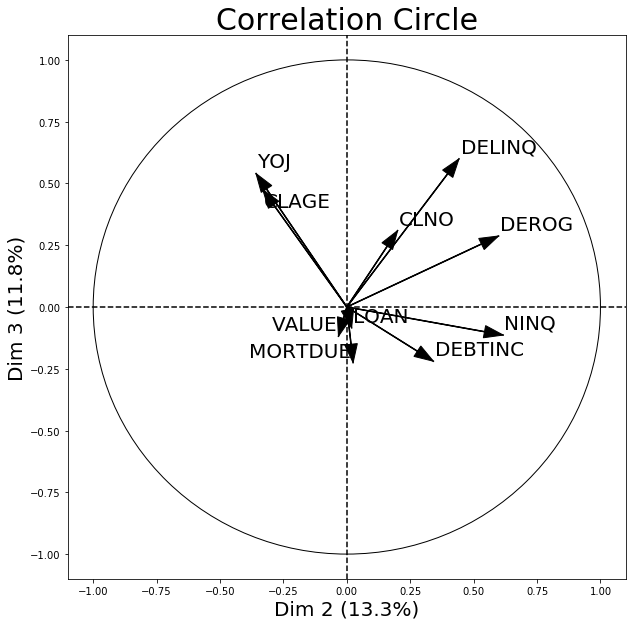

In [88]:
figure1, correlation_matrix1 = plot_pca_correlation_graph(DataFinalACP, 
                                                        feature_names,
                                                        dimensions=(2, 3),
                                                        figure_axis_size=10)

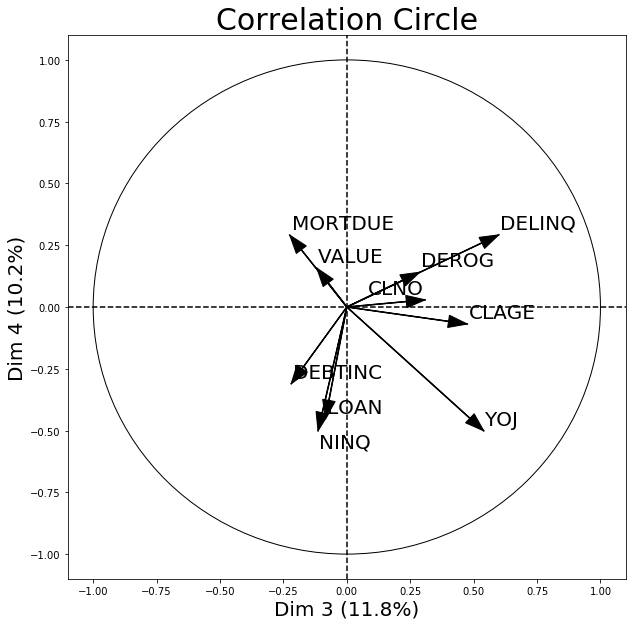

In [89]:
figure2, correlation_matrix2 = plot_pca_correlation_graph(DataFinalACP, 
                                                        feature_names,
                                                        dimensions=(3, 4),
                                                        figure_axis_size=10)

In [90]:
correlation_matrix2

,Dim 1,Dim 2,Dim 3,Dim 4
LOAN,-0.498317,0.018923,-0.084372,-0.451798
MORTDUE,-0.814838,0.024760,-0.225308,0.291201
VALUE,-0.894559,-0.032909,-0.118540,0.157636
YOJ,-0.119255,-0.358042,0.540154,-0.501390
DEROG,0.072095,0.598390,0.287415,0.140801
DELINQ,-0.019183,0.442270,0.599604,0.292168
CLAGE,-0.356657,-0.331491,0.475241,-0.068930
NINQ,0.018762,0.616527,-0.113524,-0.501317
CLNO,-0.543275,0.200225,0.309243,0.029083
DEBTINC,-0.287780,0.341259,-0.219454,-0.310792


### Interpretation du cercle de corrélation:
- les variables "VALUE" et "MORDUE" sont fortement négativement corrélées avec la première dimension 
- la variable "NINQ" est corrélée avec la deuxieme dimension et la quatrième dimensio et variable  "DELINQ" avec la troisieme 
 - ==>Pour la suite , on ne va retenir que ces variables car elles cotiennent plus d'informations pour ce jeux de données 

pca.explained_variance_ratio_

In [91]:
Data_Pca

array([[-2.99671446, -0.48045743, -0.35748833, ...,  1.15875413,
        -0.16071509,  0.30877075],
       [-1.37146665,  0.12980629,  0.44242877, ...,  0.87080987,
         0.49551088, -0.19217217],
       [-3.43381231, -0.35045109, -0.34903883, ...,  0.30177534,
         0.10285404,  0.13074399],
       ...,
       [-1.41906394,  0.01845201, -1.50378241, ..., -1.11198513,
         0.48406283,  0.15277626],
       [-1.14341835,  0.03444023, -1.38625807, ..., -0.66947995,
         0.39304674,  0.13931138],
       [-0.32001876,  4.55008819,  0.41666959, ..., -1.5559602 ,
         3.41048014, -1.17365353]])

In [92]:
principalDf=pd.DataFrame(data=Data_Pca[:,0:4],columns=["PC1","PC2",'PC3','PC4'])

In [93]:
principalDf.head()

,PC1,PC2,PC3,PC4
0,-2.996714,-0.480457,-0.357488,-0.033419
1,-1.371467,0.129806,0.442429,-1.721186
2,-3.433812,-0.350451,-0.349039,-0.251070
3,-0.286961,-0.327509,-1.455665,-1.932727
4,-2.776065,-0.261879,-0.639796,0.039843


## Algorithme Non supervisé: Segmetation
### KMEANS:

In [94]:
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Mgr,Office,Other,ProfExe,Sales
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
3,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1,0.0,1.0,0.0,0.0,0.0
4,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0.0,0.0,1.0,0.0,0.0


In [95]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



res=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(DataFinal.iloc[:,2:4])
    res.append(kmeans.inertia_)

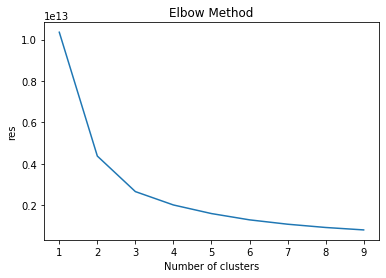

In [96]:
plt.plot(range(1, 10), res)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("res")
plt.show()

- En utilisant la  méthode "Elbow"==>Le nombre de cluster est égal  à 2

In [96]:
DataFinalSyn=pd.concat([DataFinal.iloc[:,2:4],DataFinal.iloc[:,6],DataFinal.iloc[:,8]],axis=1);

In [97]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(DataFinalSyn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
from sklearn import metrics
metrics.adjusted_rand_score(DataFinal.iloc[:,0],kmeans.labels_)

-0.023614721680793094

### Interprétation:
- le score du tableau croisé est trés faible, Donc On ne va pas  pouvoir l'utiliser pour  interpréter la variable Cible "BAD" avec les clusters
- ==> on va se contenter d'utliser le profiling des variables synthétiques

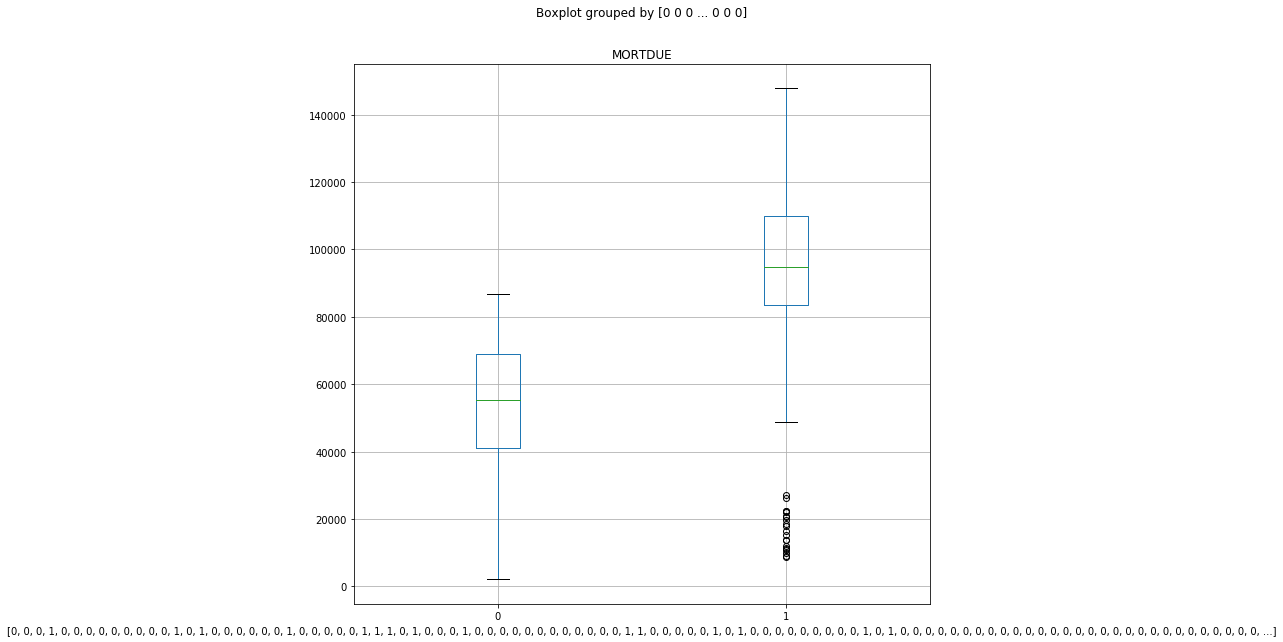

In [99]:
DataFinalSyn.boxplot(column=['MORTDUE'],by=kmeans.labels_,figsize=(10,10));

- Interprétation :
  - la variable "MORTDUE " est moyennement significative , car dans le cluster0 sa valeur est entre 1000et 85000 et dans le cluster1 , sa valeur est entre 50000 et 160000

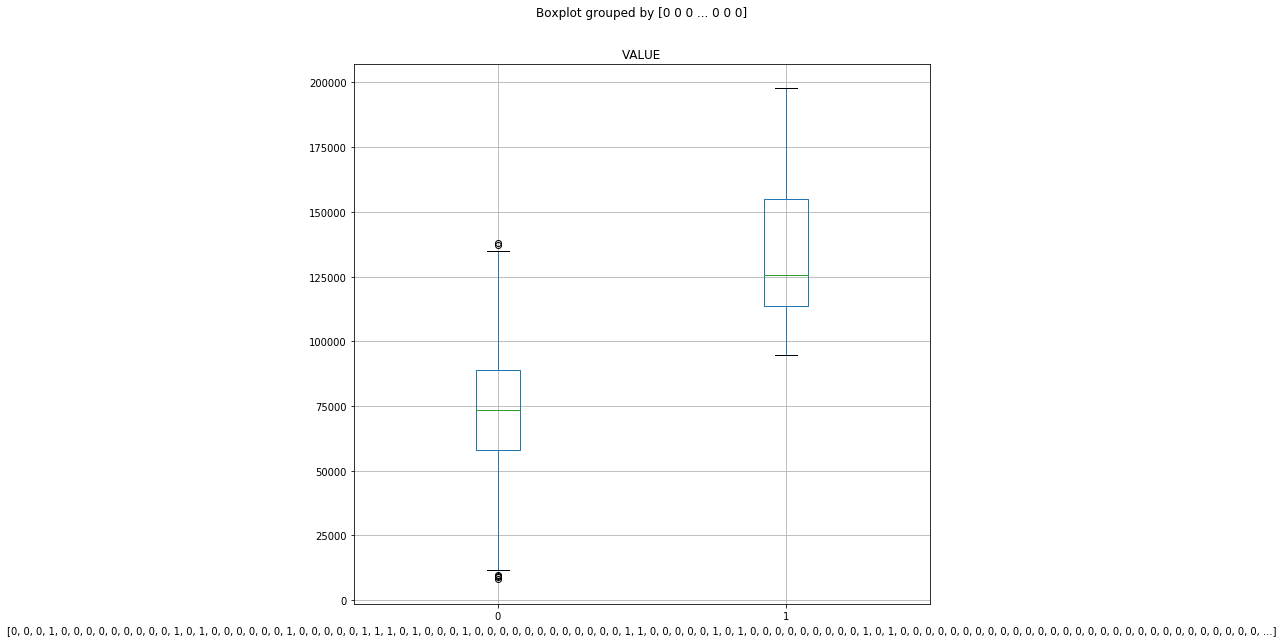

In [100]:
DataFinalSyn.boxplot(column=['VALUE'],by=kmeans.labels_,figsize=(10,10));

- Interprétation :
  - la variable "VALUE " est moyennement significative , car dans le cluster0 sa valeur est entre 10000 et 135000 et dans le cluster1 , sa valeur est entre 90000 et 200000

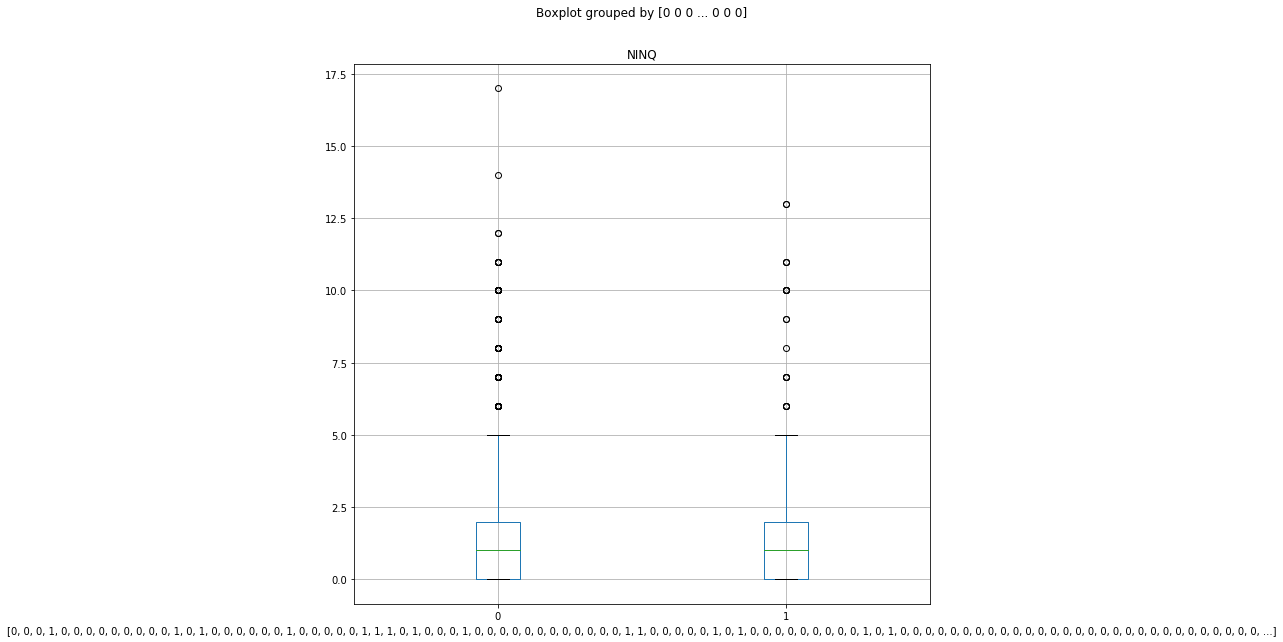

In [101]:
DataFinalSyn.boxplot(column=['NINQ'],by=kmeans.labels_,figsize=(10,10));

- La variable "NINQ" n'est pas du tout significative car on a les memes valeurs dans les deux clusters

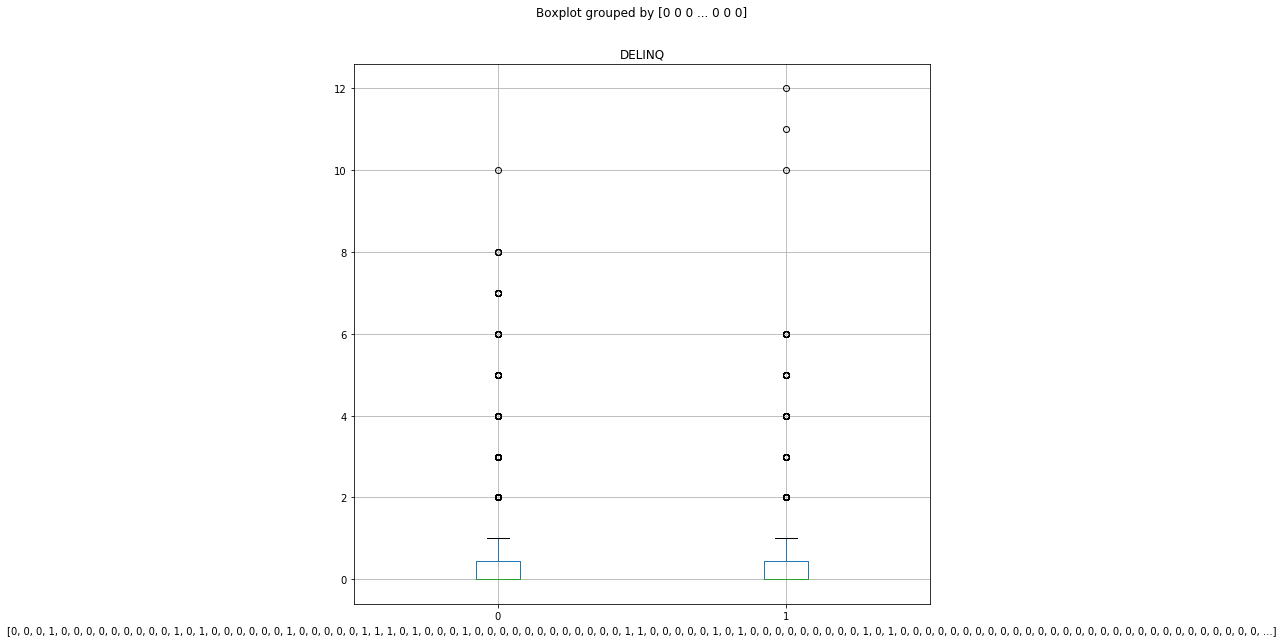

In [102]:
DataFinalSyn.boxplot(column=['DELINQ'],by=kmeans.labels_,figsize=(10,10));

- Interprétation : la variable "DELINC" n'est pas du tout significative ( car les deux clusters contiennent les memes valeurs )

##### Conclusion :
  - Dans Ce jeux de données , seulement les variables "VALUE" et "MORTDUE" sont significatives et elles sont plus élevées au niveau su cluster1 que le cluster0

### CAH:

In [103]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

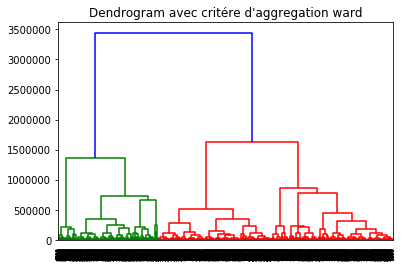

In [104]:
Z = linkage(DataFinalSyn,method='ward',metric='euclidean')
plt.title("Dendrogram avec critére d'aggregation ward") 
dendrogram(Z) 
plt.show()

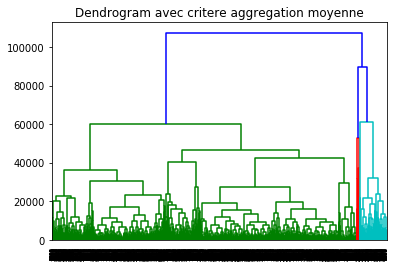

In [105]:
matriceA= linkage(DataFinalSyn, 'average')
dendrogram(matriceA)
plt.title('Dendrogram avec critere aggregation moyenne')
plt.show()

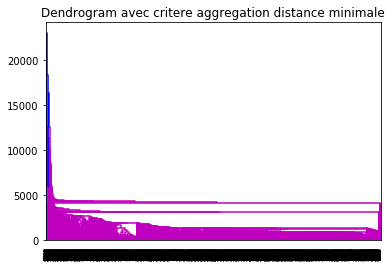

In [187]:
matriceS = linkage(DataFinalSyn, 'single')
dendrogram(matriceS)
plt.title('Dendrogram avec critere aggregation distance minimale')
plt.show()

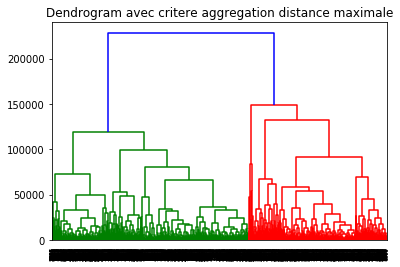

In [188]:
matrice=linkage(DataFinalSyn, 'complete')
dendrogram(matrice)
plt.title('Dendrogram avec critere aggregation distance maximale')
plt.show()

- Aprés avoir essayer d'appliquer les 4 méthodes , On a remarqué d'aprés les dendrogrammes que la méthode Ward est la meilleure ,  donc c'est elle qu'on va utiliser pour la suite

In [189]:
groupes_cah = fcluster(Z,t=2500000,criterion='distance')

In [190]:
print(groupes_cah)

[2 2 2 ... 2 2 2]


In [192]:
pd.crosstab(DataFinal.iloc[:,0],groupes_cah)

col_0,1,2
BAD,,
0,1203,2608
1,220,731


In [193]:
metrics.adjusted_rand_score(DataFinal.iloc[:,0],groupes_cah)

-0.02470677573179049

### Interprétation:
- De meme, le score du tableau croisé est trés faible, Donc On ne va pas  pouvoir l'utiliser pour  interpréter la variable Cible "BAD" avec les clusters
- ==> on va se contenter d'utliser le profiling des variables synthétiques comme on a fait au niveau du KMEANS

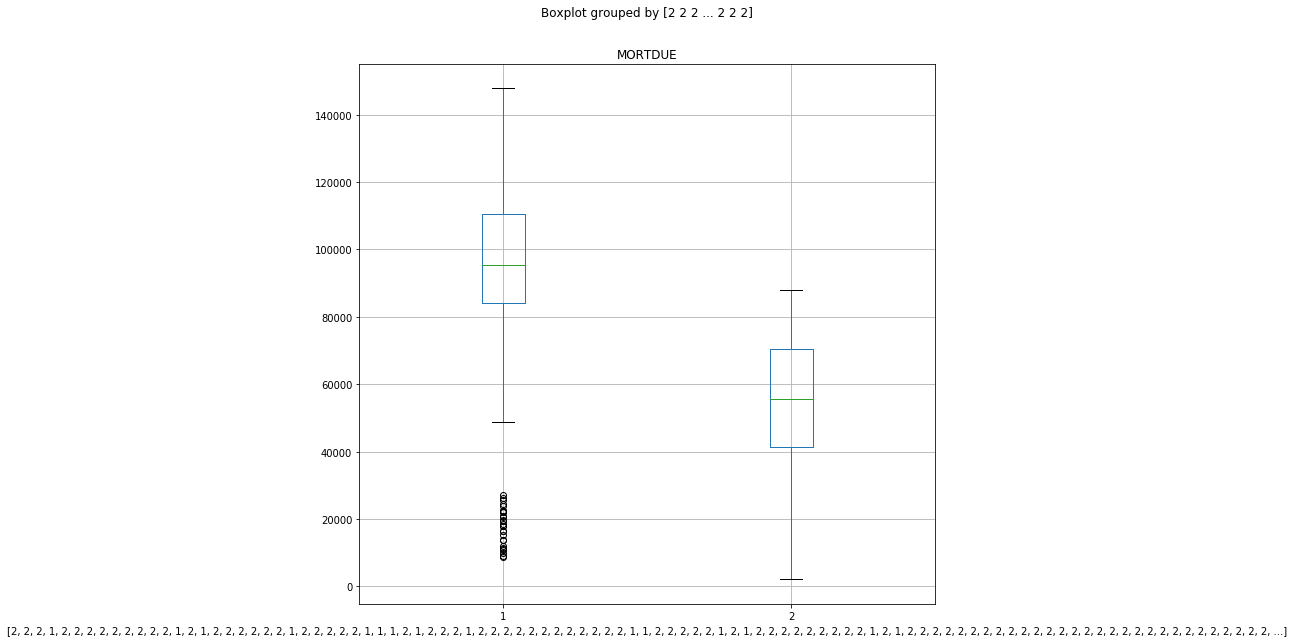

In [194]:
DataFinalSyn.boxplot(column=['MORTDUE'],by=groupes_cah,figsize=(10,10));

- Interprétation :
  - la variable "MORTDUE " est moyennement significative , car dans le cluster2 sa valeur est entre 1000et 85000 et dans le cluster1 , sa valeur est entre 50000 et 160000

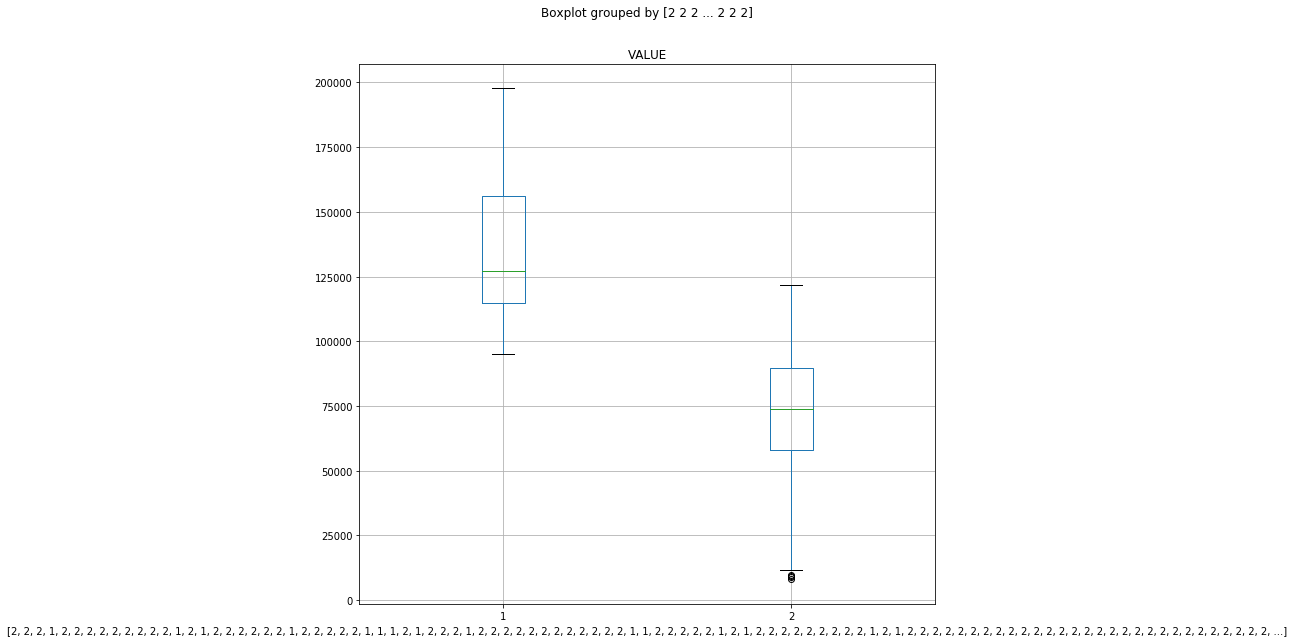

In [196]:
DataFinalSyn.boxplot(column=['VALUE'],by=groupes_cah,figsize=(10,10));

- Interprétation :
  - la variable "VALUE " est moyennement significative , car dans le cluster2 sa valeur est entre 10000 et 135000 et dans le cluster1 , sa valeur est entre 90000 et 200000

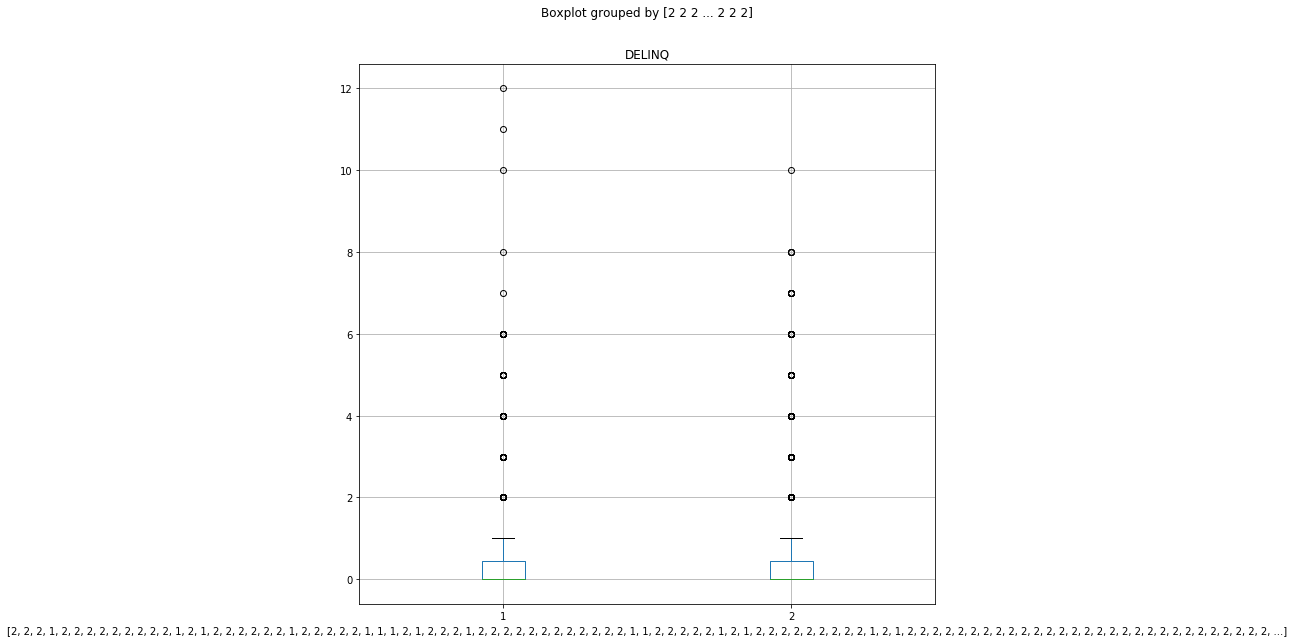

In [198]:
DataFinalSyn.boxplot(column=['DELINQ'],by=groupes_cah,figsize=(10,10));

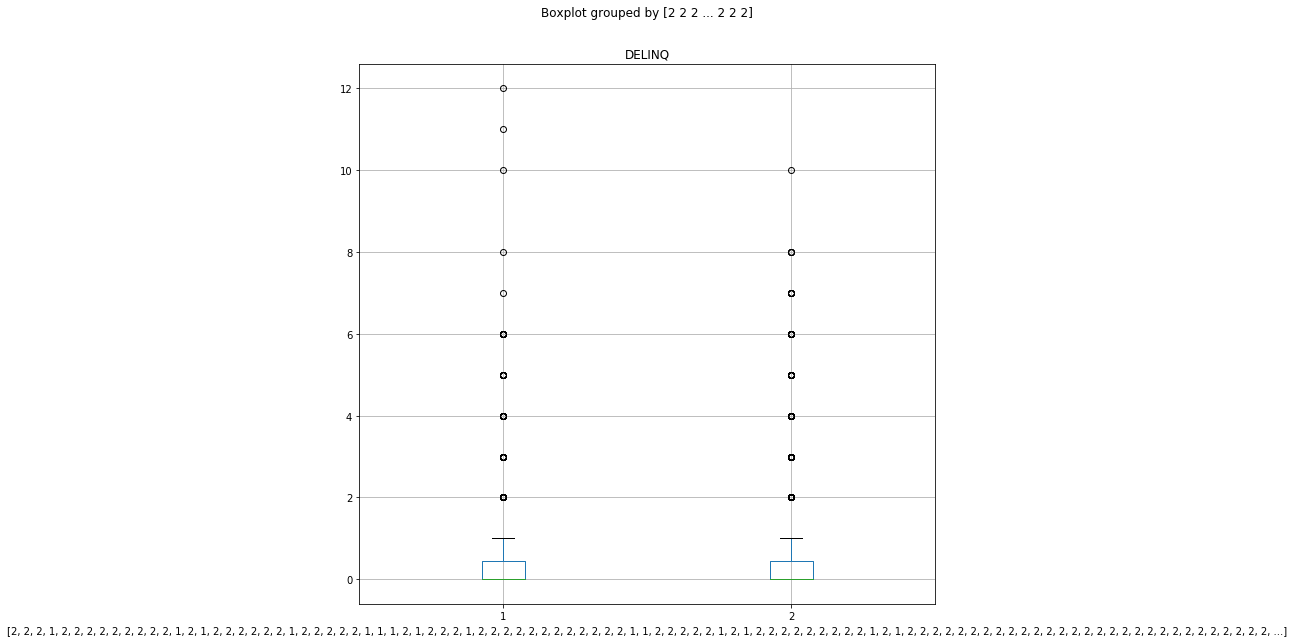

In [199]:
DataFinalSyn.boxplot(column=['DELINQ'],by=groupes_cah,figsize=(10,10));

- Interprétation : la variable "DELINC" n'est pas du tout significative ( car les deux clusters contiennent les memes valeurs )

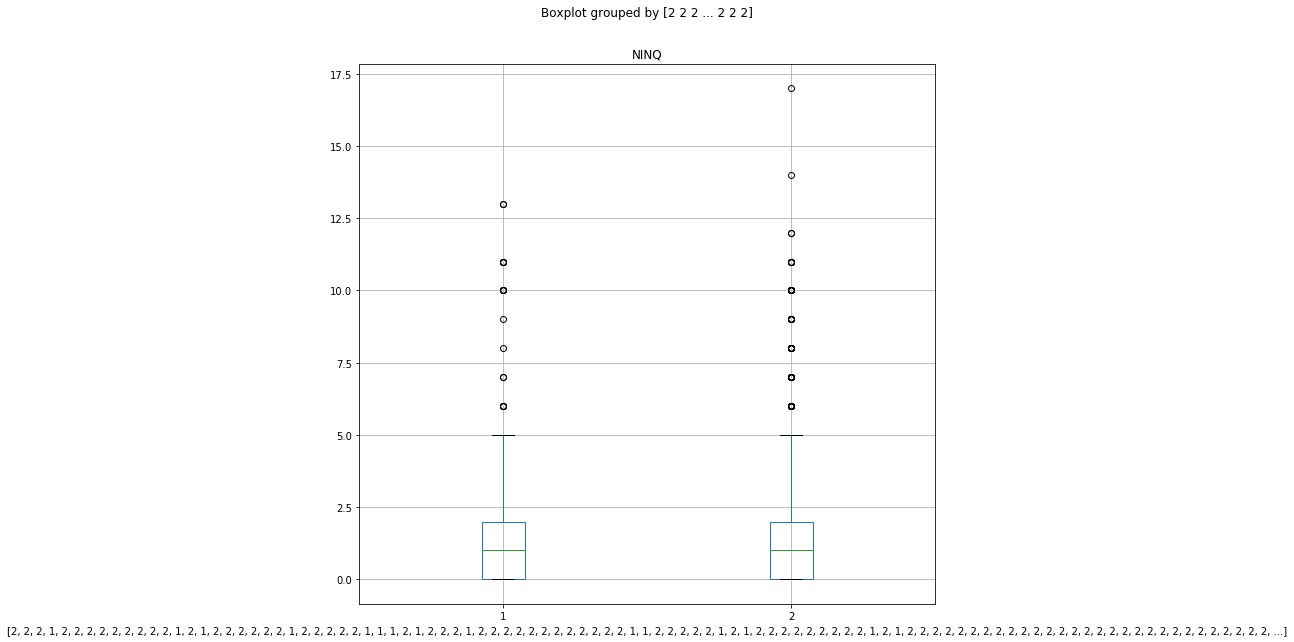

In [200]:
DataFinalSyn.boxplot(column=['NINQ'],by=groupes_cah,figsize=(10,10));

- Interprétation : la variable "NINQ" n'est pas du tout significative ( car les deux clusters contiennent les memes valeurs )

## DBSCAN:

In [110]:
from sklearn.cluster import DBSCAN
cluster=[]
for i in range(1, 25):
    clustering = DBSCAN(eps=i, min_samples=15).fit(DataFinalACP)
    n_clusters_ = len(pd.Series(clustering.labels_).unique())
    cluster.append(n_clusters_)


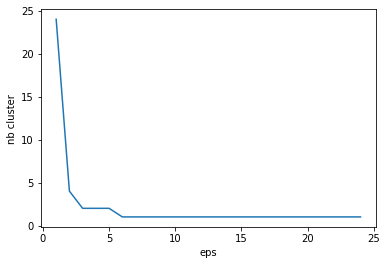

In [111]:
plt.plot(range(1, 25),cluster)
plt.xlabel("eps")
plt.ylabel("nb cluster")
plt.show()

In [112]:
clustering = DBSCAN(eps=4,min_samples=15).fit(DataFinalACP.iloc[:,1:])
n_clusters_ = len(pd.Series(clustering.labels_).unique())

In [113]:
n_clusters_

2

In [114]:
pd.crosstab(DataFinal.iloc[:,0],clustering.labels_)

col_0,-1,0
BAD,,
0,0,3811
1,13,938


In [115]:
metrics.adjusted_rand_score(DataFinalACP.iloc[:,0],clustering.labels_)

-2.4212667443950184e-05

## Supervised learning:
### KNN:

In [88]:
DataFinal.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,Mgr,Office,Other,ProfExe,Sales
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1,0.0,0.0,1.0,0.0,0.0
3,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.779915,1,0.0,1.0,0.0,0.0,0.0
4,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1,0.0,0.0,1.0,0.0,0.0


In [89]:
X=DataFinal.iloc[:,1:]
y=DataFinal.iloc[:,0]

In [90]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [91]:
X_train=StandardScaler.fit_transform(X_train)
X_test=StandardScaler.transform(X_test)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Erreur')

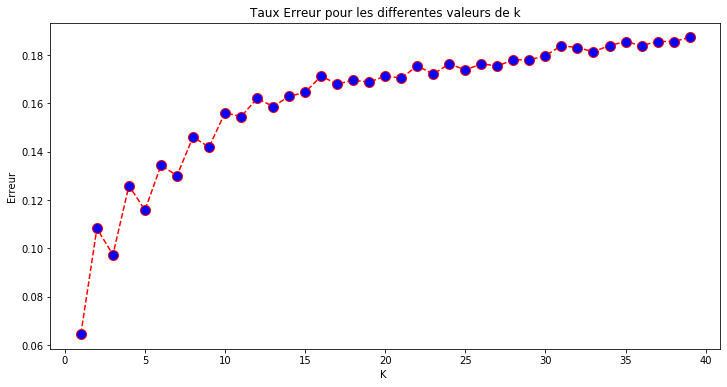

In [93]:
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

- Pour la suite , on va prendre K=3

In [124]:
knn = KNeighborsClassifier(3)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [125]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.90


In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))

[[947   6]
 [110 128]]


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       953
           1       0.96      0.54      0.69       238

    accuracy                           0.90      1191
   macro avg       0.93      0.77      0.82      1191
weighted avg       0.91      0.90      0.89      1191



## CART:

In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

In [129]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(dtc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(dtc_model.score(X_test, y_test)))


Accuracy of CART classifier on training set: 1.00
Accuracy of CART classifier on test set: 0.86


In [130]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dtc))

[[873  80]
 [ 90 148]]


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       953
           1       0.65      0.62      0.64       238

    accuracy                           0.86      1191
   macro avg       0.78      0.77      0.77      1191
weighted avg       0.86      0.86      0.86      1191



#### Random Forest:

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [95]:
print('Accuracy of CART classifier on training set: {:.2f}'
     .format(rfc_model.score(X_train, y_train)))
print('Accuracy of CART classifier on test set: {:.2f}'
     .format(rfc_model.score(X_test, y_test)))

Accuracy of CART classifier on training set: 0.99
Accuracy of CART classifier on test set: 0.89


## Logistic Regression:

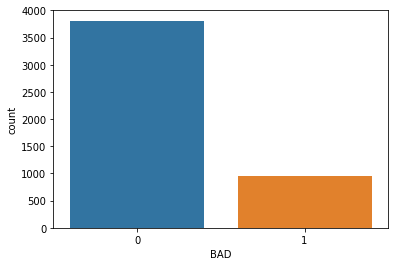

In [135]:
import seaborn as sns
sns.countplot(DataFinal['BAD'],label="Count")
plt.show()

### Over-sampling using SMOTE:

In [136]:
X = DataFinal.iloc[:,1:]
y = DataFinal.iloc[:,0]
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['BAD'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of BAD in oversampled data",len(os_data_y[os_data_y['BAD']==0]))
print("Number of no BAD",len(os_data_y[os_data_y['BAD']==1]))
print("Proportion of BAD data in oversampled data is ",len(os_data_y[os_data_y['BAD']==0])/len(os_data_X))
print("Proportion of no BAD data in oversampled data is ",len(os_data_y[os_data_y['BAD']==1])/len(os_data_X))

length of oversampled data is  5330
Number of BAD in oversampled data 2665
Number of no BAD 2665
Proportion of BAD data in oversampled data is  0.5
Proportion of no BAD data in oversampled data is  0.5


In [137]:
DataFinal.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON', 'Mgr', 'Office', 'Other',
       'ProfExe', 'Sales'],
      dtype='object')

In [138]:
X=os_data_X
y=os_data_y

#### Implémentation du Modele:

In [140]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.503588
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.273    
Dependent Variable: BAD              AIC:              5400.2525
Date:               2020-01-19 17:25 BIC:              5505.5502
No. Observations:   5330             Log-Likelihood:   -2684.1  
Df Model:           15               LL-Null:          -3694.5  
Df Residuals:       5314             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
LOAN        -0.0001    0.0000  -11.6476  0.0000  -0.0001  -0.0001
MORTDUE     -0.0000    0.0000   -2.4886  0.0128  -0.0000  -0.0000
VALUE   

##### Interpretation :
- la p_value de toutes les variables est supérieure à 0.05 sauf pour YOJ,VALUE,Sales , on va donc supprimer ces trois variables

In [142]:
cols=['LOAN', 'MORTDUE', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC', 'REASON', 'Mgr', 'Office', 'Other',
       'ProfExe']
X=os_data_X[cols]
y=os_data_y['BAD']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.504022
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.273    
Dependent Variable: BAD              AIC:              5398.8733
Date:               2020-01-19 17:26 BIC:              5484.4277
No. Observations:   5330             Log-Likelihood:   -2686.4  
Df Model:           12               LL-Null:          -3694.5  
Df Residuals:       5317             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
LOAN        -0.0001    0.0000  -11.7604  0.0000  -0.0001  -0.0000
MORTDUE     -0.0000    0.0000   -2.6395  0.0083  -0.0000  -0.0000
DEROG   

### Logistic Regression Model Fitting:

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_pred = logreg.predict(X_test)
print('Accuracy of CART classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of CART classifier on training set: 0.63
Accuracy of logistic regression classifier on test set: 0.65


In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[506 299]
 [268 526]]


In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       805
           1       0.64      0.66      0.65       794

    accuracy                           0.65      1599
   macro avg       0.65      0.65      0.65      1599
weighted avg       0.65      0.65      0.65      1599



#### Interpréation des 3 méthodes :
- D'aprés les 3 méthodes KNN,Cart et Logistic Regression , la dernière est la meilleure , car on remarque qu'au niveau de Logistic Regression le score du training Set et du test Test set est presque le meme ( les deux valeurs sont proches) , Contrairement aux deux autres méthodes qui ont les valeurs du  training set et du test set éloignées